### Basic Outline: Part 1

### Jacobi Matrix - Tridiagonal matrix

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import scipy.linalg as la
import matplotlib.pyplot as plt

In [2]:
check = 0

In [34]:
n = 64

#### Manual function for eigenvalues and eigenvectors

In [35]:
def lud(a):
    n = a.shape[0]
    l = np.zeros((n, n))
    u = np.zeros((n, n))
    np.fill_diagonal(l, 1)
    u[0] = a[0]

    for i in range(1, n):
        for j in range(n):
            if i <= j:
                u[i][j] = a[i][j] - sum(u[k][j] * l[i][k] for k in range(i))
            if i > j:
                l[i][j] = (a[i][j] - sum(u[k][j] * l[i][k] for k in range(j))) / u[j][j]
                
    return l, u
    
def shift(A):
    possible_shift_vals = []
    
    for i in range(np.shape(A)[0]):
        up_lim = A[i][i]
        low_lim = A[i][i] 
        
        for j in range(np.shape(A)[0]):
            if i != j :
                up_lim=up_lim+abs(A[i][j])
                low_lim=low_lim-abs(A[i][j])
                
        possible_shift_vals.append(up_lim )
        possible_shift_vals.append(low_lim)    

    shift=np.max(np.abs(possible_shift_vals))
    return shift

def UL_eigen (A, iters= 50000, tol = 1e-15):
    m,n = A.shape 
    I = np.identity (np.shape(A)[0])
    shift_A = shift(A) + 1
    A = A + I * (shift_A)
    
    D1 = A ; D2 = np.ones(np.shape(A))
    iter = 0
  
    while (np.allclose(np.diagonal (D1), np.diagonal (D2), tol)==False) :
        L,U = lud(D1)
        D2 = np.matmul (U,L)
        
        if (np.allclose(np.diagonal (D1), np.diagonal (D2), tol)==True):
            return np.diagonal(D2) -(shift_A)
            
        D1 = D2
        D2 = np.zeros((m,n))
        iter = iter + 1

        if (iter > iters):
            raise ValueError ("System fails to converge after 50000 iterations. Try another matrix")
            return "NA"

In [36]:
def eigenvector_for_eigenvalue(A, eigenvalue, tol=1e-6):
    n = A.shape[0]
    I = np.eye(n)
    matrix = A - eigenvalue * I
    U, S, Vt = np.linalg.svd(matrix)
    null_space_index = np.argmin(S)
    
    if S[null_space_index] > tol:
        raise ValueError("Provided eigenvalue does not correspond to an eigenvector in this matrix.")

    eigenvector = Vt.T[:, null_space_index]
    eigenvector /= np.linalg.norm(eigenvector)
    
    return eigenvector

In [37]:
def eigenv (matrix):
    table=[]
    e = UL_eigen(matrix)
    
    for i in range(len(e)):
        vect = eigenvector_for_eigenvalue(matrix, e[i])
        table.append(vect)
        
    eigv = pd.DataFrame(table)
    eigv = eigv.iloc[:,0].values
    return eigv

#### Forming Jacobi matrix

In [38]:
def jacobi_matrix(n):
    matrix = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if i == j:
                matrix[i][j] = 0 
            elif np.abs(i-j) == 1 and i>j:
                matrix[i][j] = i/np.sqrt((2*i-1)*(2*i+1))
                matrix[j][i] = matrix[i][j]
    return matrix

In [39]:
matrix = jacobi_matrix(n)
matrix

array([[0.        , 0.57735027, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.57735027, 0.        , 0.51639778, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.51639778, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.50001626,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.50001626, 0.        ,
        0.50001575],
       [0.        , 0.        , 0.        , ..., 0.        , 0.50001575,
        0.        ]])

#### Calculating eigenvalues and eigenvectors of the above matrix

In [40]:
def roots_weights(matrix):
    if (n > 8):
        roots, eigenvectors = np.linalg.eigh(matrix)
        weights = np.zeros([len(eigenvectors)])
        weights = (eigenvectors[0] ** 2) * 2
    else:
        roots = UL_eigen(matrix)
        eigenvectors = eigenv (matrix)
        weights = (eigenvectors ** 2) * 2
    
    return roots, weights

In [41]:
roots1, weights1 = roots_weights (matrix)

In [42]:
roots1

array([-0.99930504, -0.99634012, -0.99101337, -0.98333625, -0.97332683,
       -0.9610088 , -0.94641137, -0.92956917, -0.91052214, -0.88931545,
       -0.8659994 , -0.8406293 , -0.81326532, -0.78397236, -0.75281991,
       -0.71988185, -0.68523631, -0.64896547, -0.61115536, -0.57189565,
       -0.53127946, -0.48940315, -0.44636602, -0.40227016, -0.35722016,
       -0.31132287, -0.26468716, -0.21742364, -0.16964442, -0.12146282,
       -0.07299312, -0.02435029,  0.02435029,  0.07299312,  0.12146282,
        0.16964442,  0.21742364,  0.26468716,  0.31132287,  0.35722016,
        0.40227016,  0.44636602,  0.48940315,  0.53127946,  0.57189565,
        0.61115536,  0.64896547,  0.68523631,  0.71988185,  0.75281991,
        0.78397236,  0.81326532,  0.8406293 ,  0.8659994 ,  0.88931545,
        0.91052214,  0.92956917,  0.94641137,  0.9610088 ,  0.97332683,
        0.98333625,  0.99101337,  0.99634012,  0.99930504])

In [66]:
np.round(np.sum(roots1),10)

0.0

In [43]:
weights1

array([0.00178328, 0.00414703, 0.00650446, 0.00884676, 0.01116814,
       0.01346305, 0.01572603, 0.01795172, 0.02013482, 0.02227017,
       0.0243527 , 0.02637747, 0.02833967, 0.03023466, 0.03205793,
       0.03380516, 0.03547221, 0.03705513, 0.03855015, 0.03995374,
       0.04126256, 0.04247352, 0.04358372, 0.04459056, 0.04549163,
       0.0462848 , 0.04696818, 0.04754017, 0.04799939, 0.04834476,
       0.04857547, 0.04869096, 0.04869096, 0.04857547, 0.04834476,
       0.04799939, 0.04754017, 0.04696818, 0.0462848 , 0.04549163,
       0.04459056, 0.04358372, 0.04247352, 0.04126256, 0.03995374,
       0.03855015, 0.03705513, 0.03547221, 0.03380516, 0.03205793,
       0.03023466, 0.02833967, 0.02637747, 0.0243527 , 0.02227017,
       0.02013482, 0.01795172, 0.01572603, 0.01346305, 0.01116814,
       0.00884676, 0.00650446, 0.00414703, 0.00178328])

In [68]:
np.round(np.sum(weights1),10)

2.0

#### Tabulating roots and weights for n = 1 to 64

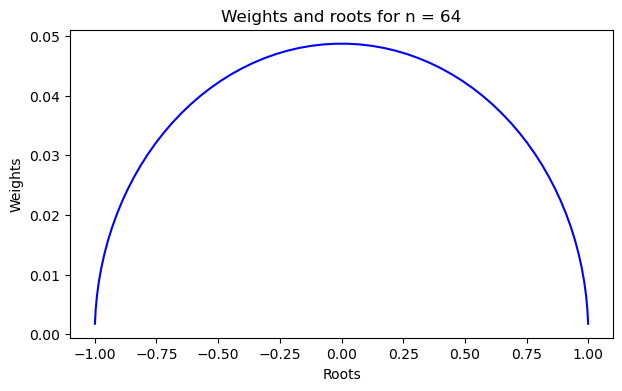

In [44]:
plt.figure(figsize = (7,4))
plt.plot(roots1, weights1, color = 'b')
plt.title(f'Weights and roots for n = {n}')
plt.xlabel('Roots')
plt.ylabel('Weights')
plt.show()

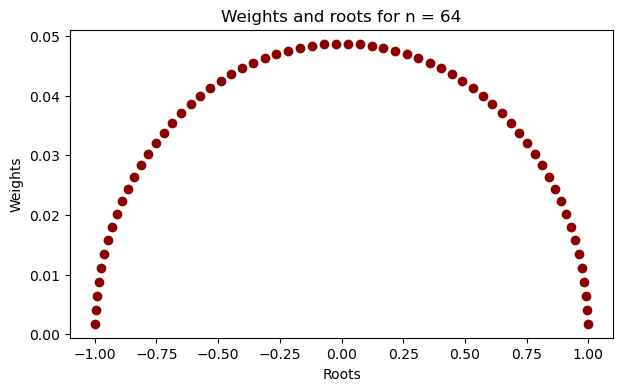

In [45]:
plt.figure(figsize = (7,4))
plt.scatter(roots1, weights1, color = 'darkred')
plt.title(f'Weights and roots for n = {n}')
plt.xlabel('Roots')
plt.ylabel('Weights')
plt.show()

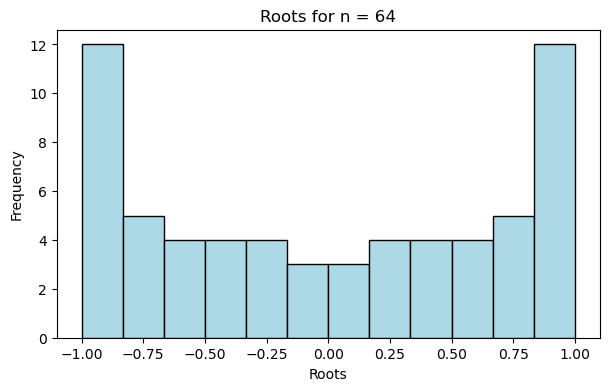

In [47]:
if (n > 30):
    bin = int(n/5)
else:
    bin = int(n/2)

plt.figure(figsize = (7,4))
plt.hist(roots1, bins = bin, edgecolor = 'black', color = 'lightblue')
plt.title(f'Roots for n = {n}')
plt.xlabel('Roots')
plt.ylabel('Frequency')
plt.show()

# Roots and Weights using Companion Matrix

#### Companion matrix for n = 64 

In [48]:
def Gauss_polynomial(n):
    def P(n):
            x = sp.symbols('x')
            if n == 0:
                return 1
            elif n == 1:
                return x
                
            result = ((2 * n - 1) * x * P(n-1) - (n - 1) * P(n-2)) / n
            return sp.expand(result)

    def P_above_23(n, P_23, P_24):
            x = sp.symbols('x')
            if n == 23:
                return P_23
            elif n == 24:
                return P_24
                
            result = ((2 * n - 1) * x * P_above_23 (n-1,P_23, P_24) - (n - 1) * P_above_23 (n-2,P_23, P_24)) / n
            return sp.expand(result)

    def P_above_38(n, P_38, P_39):
            x = sp.symbols('x')
            if n == 38:
                return P_38
            elif n == 39:
                return P_39
                
            result = ((2 * n - 1) * x * P_above_38 (n-1,P_38, P_39) - (n - 1) * P_above_38 (n-2,P_38, P_39)) / n
            return sp.expand(result)
        
    def P_above_52(n, P_52, P_53):
            x = sp.symbols('x')
            if n == 52:
                return P_52
            elif n == 53:
                return P_53
                
            result = ((2 * n - 1) * x * P_above_52 (n-1,P_52, P_53) - (n - 1) * P_above_52 (n-2,P_52, P_53)) / n
            return sp.expand(result)

    if (n < 24):
        return P(n)
    
    elif (n > 23 and n < 39):
        P_23 = P(23); P_24 = P(24)
        return P_above_23(n, P_23, P_24)

    elif (n > 38 and n < 52):
        P_23 = P(23); P_24 = P(24)
        P_38 = P_above_23 (38, P_23, P_24); P_39 = P_above_23 (39, P_23, P_24)
        return P_above_38(n, P_38, P_39)
        
    elif (n > 51):
        P_23 = P(23); P_24 = P(24)
        P_38 = P_above_23 (38, P_23, P_24); P_39 = P_above_23 (39, P_23, P_24)
        P_52 = P_above_38(52, P_38, P_39); P_53 = P_above_38(53, P_38, P_39)
        return P_above_52(n, P_52, P_53)

In [49]:
legendre_n = Gauss_polynomial(n)
legendre_n

11975573020964041433067793888190275875*x**64/9223372036854775808 - 5940638585202634726639929251621947875*x**62/288230376151711744 + 89869980516945458144608849718536827453*x**60/576460752303423488 - 215541823191048050021622850950962309745*x**58/288230376151711744 + 2944550692023160551121839443156534694285*x**56/1152921504606846976 - 1905297506603221533078837286748345978655*x**54/288230376151711744 + 7767751373074672404090644322897102836055*x**52/576460752303423488 - 6397539329625475532810058616249415130813*x**50/288230376151711744 + 69353855564523960422055945176155164028725*x**48/2305843009213693952 - 9788682316914793212722610880718596724775*x**46/288230376151711744 + 18589515959645524725078719745951830477325*x**44/576460752303423488 - 7470553142661285637181167748373165518925*x**42/288230376151711744 + 20419511923274180741628525178886652418395*x**40/1152921504606846976 - 2973715328632162243926484249352425109475*x**38/288230376151711744 + 2956890913760127379745853503952977159775*x**36/57

In [50]:
def companion (n):
    poly = sp.Poly(Gauss_polynomial (n))
    coeffs = poly.all_coeffs()
    degree = len(coeffs) - 1
    coeffs = [c / coeffs[0] for c in coeffs]
    
    matrix = sp.zeros(degree, degree)
    for i in range(1, degree):
        matrix[i, i - 1] = 1
    arr = np.array([-c for c in coeffs[1:]]).reshape(-1,1)
    matrix[:, -1] = arr [::-1]
    return matrix

In [51]:
matrix_n = companion (n)
matrix_n

Matrix([
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1076700625791/14071741911296502306089857301375],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,                                               0],
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   34454420025312/216488337096869266247536266175],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,                                               0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

In [52]:
def root (matrix):
    roots = []
    
    if (n>8):
        eigs = matrix.eigenvals()
        for r in eigs.keys():
            roots.append(r.evalf(50))
    else:
        matrix_n1 = np.array(matrix, dtype=float)
        eigs = UL_eigen(matrix_n1)
        for r in eigs:
            roots.append(r)
    return roots

In [56]:
roots = root (matrix_n)
roots_x = np.sort(roots)
roots_x

array([-0.99930504173577213945690562434563631196971219167561,
       -0.99634011677195527934692450067639912320985750634023,
       -0.99101337147674432073938238344330311364134944539079,
       -0.98333625388462595693129930215683111694524750662374,
       -0.97332682778991096374185350735227266802614529445517,
       -0.96100879965205371891861412189715720676211461103785,
       -0.94641137485840281606248149134726479527939497179523,
       -0.92956917213193957582149015455922560734742701442971,
       -0.91052213707850280575638066800832986101348808488836,
       -0.88931544599511410585340403827285162242919446151045,
       -0.86599939815409281976078338507015750241250191875825,
       -0.84062929625258036275169154469587330298248982380176,
       -0.81326531512279755974192333808630334069814182256560,
       -0.78397235894334140761022052521376828405641412498983,
       -0.75281990726053189661186377488569398555171427132209,
       -0.71988185017161082684894021783194724475813800331490,
       -

In [76]:
np.round(np.sum(roots_x.astype(float)),10)

0.0

In [57]:
# Lagrangian function: 
def weight_i (root, roots):
    prod = 1; x = sp.symbols('x')
    for r in roots:
        if (r == root):
            continue
        else:
            prod *= (x - r) / (root - r)
    lagrangian = sp.simplify(prod)
    
    definite_integral = sp.integrate(lagrangian, (x, -1, 1))
    return sp.expand(definite_integral)

In [58]:
weights_n = []
for j in range (n):
    weights_n.append(weight_i (roots_x[j], roots_x))

In [59]:
display(weights_n)

[0.0017832807216964329472958533374975707045929570225579,
 0.0041470332605624676352879001833959024882077159744025,
 0.0065044579689783628561154109626459009566635709718574,
 0.0088467598263639477230299033354132672531977488796602,
 0.011168139460131128818594286823882490881287719436154,
 0.013463047896718642598065959571971578405574542175738,
 0.015726030476024719321962579459194778536653090512279,
 0.017951715775697343085054635190576404915863882651949,
 0.020134823153530209372346330839402300904273280069975,
 0.022270173808383254159287816189409816130164694229206,
 0.024352702568710873338172353335600234553749322859943,
 0.026377469715054658671690907242512514544721028817550,
 0.028339672614259483227509120520360196869620299111969,
 0.030234657072402478867976392022199659435199468503320,
 0.032057928354851553585475735696372916571351181358678,
 0.033805161837141609391550172079137274490719492993557,
 0.035472213256882383810684434646910458276410811750011,
 0.03705512854024004604042004899535256778219

In [75]:
np.round(np.sum(np.array(weights_n).astype(float)),10)

2.0

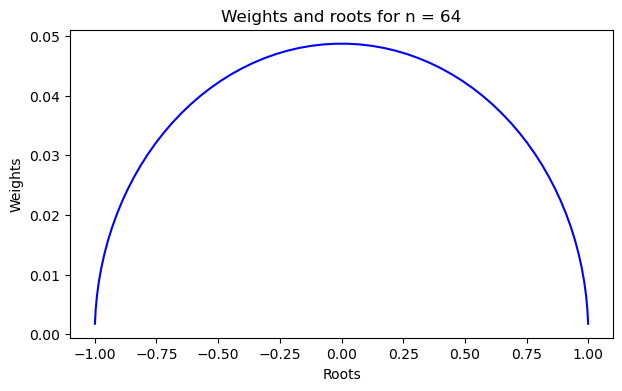

In [60]:
plt.figure(figsize = (7,4))
plt.plot(roots_x, weights_n, color = 'b')
plt.title(f'Weights and roots for n = {n}')
plt.xlabel('Roots')
plt.ylabel('Weights')
plt.show()

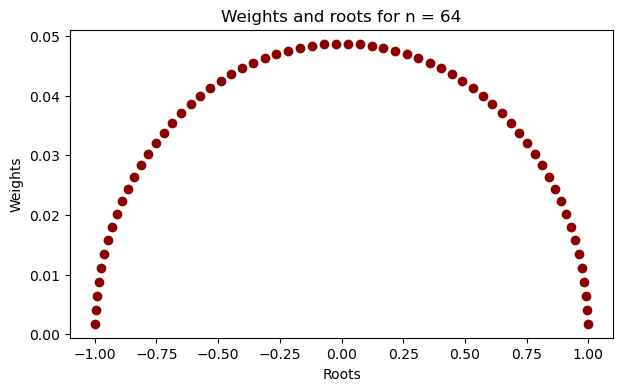

In [61]:
plt.figure(figsize = (7,4))
plt.scatter(roots_x, weights_n, color = 'darkred')
plt.title(f'Weights and roots for n = {n}')
plt.xlabel('Roots')
plt.ylabel('Weights')
plt.show()

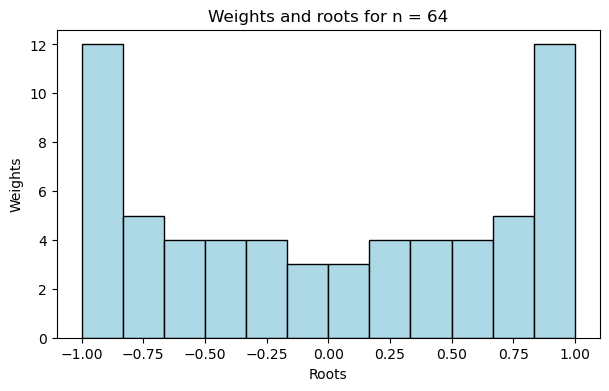

In [62]:
if (n > 30):
    bin = int(n/5)
else:
    bin = int(n/2)

plt.figure(figsize = (7,4))
plt.hist(np.array(roots_x, dtype=float), bins = bin, edgecolor = 'black', color = 'lightblue')
plt.title(f'Weights and roots for n = {n}')
plt.xlabel('Roots')
plt.ylabel('Weights')
plt.show()

In [63]:
roots1, weights1

(array([-0.99930504, -0.99634012, -0.99101337, -0.98333625, -0.97332683,
        -0.9610088 , -0.94641137, -0.92956917, -0.91052214, -0.88931545,
        -0.8659994 , -0.8406293 , -0.81326532, -0.78397236, -0.75281991,
        -0.71988185, -0.68523631, -0.64896547, -0.61115536, -0.57189565,
        -0.53127946, -0.48940315, -0.44636602, -0.40227016, -0.35722016,
        -0.31132287, -0.26468716, -0.21742364, -0.16964442, -0.12146282,
        -0.07299312, -0.02435029,  0.02435029,  0.07299312,  0.12146282,
         0.16964442,  0.21742364,  0.26468716,  0.31132287,  0.35722016,
         0.40227016,  0.44636602,  0.48940315,  0.53127946,  0.57189565,
         0.61115536,  0.64896547,  0.68523631,  0.71988185,  0.75281991,
         0.78397236,  0.81326532,  0.8406293 ,  0.8659994 ,  0.88931545,
         0.91052214,  0.92956917,  0.94641137,  0.9610088 ,  0.97332683,
         0.98333625,  0.99101337,  0.99634012,  0.99930504]),
 array([0.00178328, 0.00414703, 0.00650446, 0.00884676, 0.0111

In [64]:
roots_x, weights_n

(array([-0.99930504173577213945690562434563631196971219167561,
        -0.99634011677195527934692450067639912320985750634023,
        -0.99101337147674432073938238344330311364134944539079,
        -0.98333625388462595693129930215683111694524750662374,
        -0.97332682778991096374185350735227266802614529445517,
        -0.96100879965205371891861412189715720676211461103785,
        -0.94641137485840281606248149134726479527939497179523,
        -0.92956917213193957582149015455922560734742701442971,
        -0.91052213707850280575638066800832986101348808488836,
        -0.88931544599511410585340403827285162242919446151045,
        -0.86599939815409281976078338507015750241250191875825,
        -0.84062929625258036275169154469587330298248982380176,
        -0.81326531512279755974192333808630334069814182256560,
        -0.78397235894334140761022052521376828405641412498983,
        -0.75281990726053189661186377488569398555171427132209,
        -0.71988185017161082684894021783194724475813800

In [33]:
for n in range (2,65):
    roots1, weights1 = roots_weights (jacobi_matrix (n))
    
    roots = root (companion (n))
    roots2 = np.sort (roots)
    
    weights_n = []
    for j in range (n):
        weights_n.append(weight_i (roots2[j], roots2))       
    weights2 = weights_n
    print (n)
    df = pd.DataFrame({
    'roots1': roots1,
    'roots2': roots2
    })
    #print(df)
    print(np.allclose(np.round(np.sort(roots1.astype(float)),4), np.round(roots2.astype(float),4), 1e-4))

2
True
3
True
4
True
5
True
6
True
7
True
8
True
9
True
10
True
11
True
12
True
13
True
14
True
15
True
16
True
17
True
18
True
19
True
20
True
21
True
22
True
23
True
24
True
25
True
26
True
27
True
28
True
29
True
30
True
31
True
32
True
33
True
34
True
35
True
36
True
37
True
38
True
39
True
40
True
41
True
42
True
43
True
44
True
45
True
46
True
47
True
48
True
49
True
50
True
51
True
52
True
53
True
54
True
55
True
56
True
57
True
58
True
59
True
60
True
61
True
62
True
63
True
64
True
